```{contents}
```

## Intiution

* Imagine two classes of points in space. Many lines (or hyperplanes) could separate them.
* SVM chooses the line that leaves the **widest possible margin** between the two classes.
* The margin is defined by the **support vectors**: data points closest to the boundary.
* Wider margin = better generalization to unseen data.
* If data is not linearly separable, SVM uses the **kernel trick** to map it into higher dimensions where separation is possible.

---

### Mathematical Formulation

#### 1. Linear SVM (Hard Margin)

Given dataset: $(x_i, y_i)$, where $x_i \in \mathbb{R}^n$, $y_i \in \{-1, +1\}$.

We want a hyperplane:

$$
w \cdot x + b = 0
$$

where $w$ is the weight vector, $b$ is the bias.

**Constraints (perfect separation):**

$$
y_i (w \cdot x_i + b) \geq 1 \quad \forall i
$$

**Optimization (maximize margin = minimize norm of $w$):**

$$
\min_{w,b} \; \frac{1}{2} \|w\|^2
$$

subject to above constraints.

---

#### 2. Soft Margin SVM (with slack variables for misclassification)

Allows some violations with penalty $C$.

$$
\min_{w,b,\xi} \; \frac{1}{2} \|w\|^2 + C \sum_{i=1}^m \xi_i
$$

subject to

$$
y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Here:

* $C$ controls trade-off between large margin and classification errors.

---

#### 3. Kernelized SVM (Non-linear)

Use kernel function $K(x_i, x_j)$ instead of explicit mapping $\phi(x)$:

$$
K(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)
$$

Common kernels:

* Linear: $K(x_i, x_j) = x_i \cdot x_j$
* Polynomial: $K(x_i, x_j) = (x_i \cdot x_j + 1)^d$
* RBF (Gaussian): $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$

---

#### 4. Dual Formulation

The optimization can be expressed in terms of Lagrange multipliers $\alpha_i$:

$$
\max_{\alpha} \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

subject to

$$
\sum_{i=1}^m \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
$$

Final classifier:

$$
f(x) = \text{sign}\left( \sum_{i=1}^m \alpha_i y_i K(x_i, x) + b \right)
$$


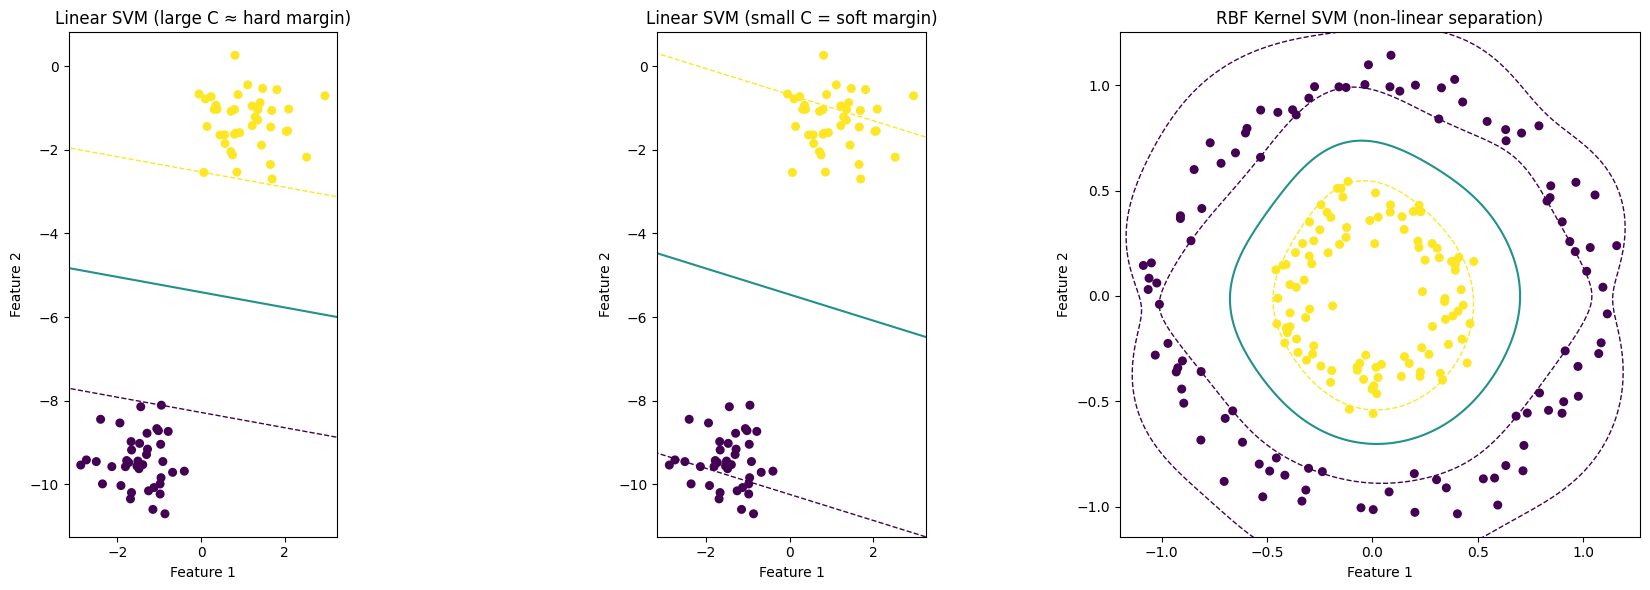

Interpretation:
 - Decision boundary is where decision_function == 0.
 - Support vectors lie on or near the margin lines (±1 for linear SVM).
 - Large C forces fewer margin violations. It focuses on classification accuracy.
 - Small C allows margin violations to increase margin width for better generalization.
 - Kernel SVM uses an implicit mapping φ(x) so a linear boundary in feature space
   corresponds to a non-linear boundary in the original input space.


In [10]:
# Demonstration of SVM intuition and math with toy datasets
# Three separate plots are produced:
# 1) Linearly separable data with a large C (close to hard-margin)
# 2) Same data with small C (soft margin, allows misclassification)
# 3) Non-linearly separable data handled by RBF kernel
#
# Rules followed:
# - Use matplotlib (no seaborn)
# - Each chart is a separate figure (no subplots)
# - No specific color settings are provided

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def plot_svm_subplot(ax, clf, X, y, title):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0]-0.5, xlim[1]+0.5, 500)
    yy = np.linspace(ylim[0]-0.5, ylim[1]+0.5, 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(xy).reshape(XX.shape)
    else:
        Z = clf.predict_proba(xy)[:, 1].reshape(XX.shape)
    ax.contour(XX, YY, Z, levels=[-1.0, 0.0, 1.0],
               linestyles=['--','-','--'],
               linewidths=[1.0, 1.5, 1.0])
    sv = clf.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], s=120, facecolors='none', linewidths=1.5)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal', adjustable='box')

# 1) Linearly separable data (hard-ish margin)
X1, y1 = make_blobs(n_samples=80, centers=2, cluster_std=0.6, random_state=2)
y1 = np.where(y1==0, -1, 1)  # convert labels to -1 and +1 for clarity

clf_hard = SVC(kernel='linear', C=10000000000)  # large C approximates hard margin
clf_hard.fit(X1, y1)

# 2) Same data but with soft margin (smaller C)
clf_soft = SVC(kernel='linear', C=0.001)  # allow misclassifications to increase margin
clf_soft.fit(X1, y1)

# 3) Non-linear data solved with RBF kernel
X2, y2 = make_circles(n_samples=200, factor=0.4, noise=0.08, random_state=1)
y2 = np.where(y2==0, -1, 1)

clf_rbf = SVC(kernel='rbf', gamma=5, C=1.0)
clf_rbf.fit(X2, y2)
plot_svm_subplot(axes[0], clf_hard, X1, y1, "Linear SVM (large C ≈ hard margin)")
plot_svm_subplot(axes[1], clf_soft, X1, y1, "Linear SVM (small C = soft margin)")
plot_svm_subplot(axes[2], clf_rbf, X2, y2, "RBF Kernel SVM (non-linear separation)")
plt.tight_layout()
plt.show()

# Print short explanation tying visuals to math
print("Interpretation:")
print(" - Decision boundary is where decision_function == 0.")
print(" - Support vectors lie on or near the margin lines (±1 for linear SVM).")
print(" - Large C forces fewer margin violations. It focuses on classification accuracy.")
print(" - Small C allows margin violations to increase margin width for better generalization.")
print(" - Kernel SVM uses an implicit mapping φ(x) so a linear boundary in feature space")
print("   corresponds to a non-linear boundary in the original input space.")
